Importing Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

Loading Dataset

In [3]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary" , conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142219.0,5107867.81,673589.09,261311.55,68601.68,1296616.21,25.384686,0.980280,1.340207
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160588.0,4828959.08,562150.15,295065.24,144929.24,1024917.86,21.224406,0.978968,1.269429
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187538.0,4547469.62,462126.73,344585.38,123780.22,1129165.94,24.830643,1.000699,1.330329
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200929.0,4486824.71,420511.79,369192.74,257032.07,1225626.77,27.316128,0.996266,1.375821
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,136034.0,4228985.66,546438.06,249947.98,257032.07,1205779.65,28.512266,0.984976,1.398841


Exploratory Data Analysis
* Previously , we examined the various tables in the database to identify key variables, understand their relationships, and determine 
which ones should be included in the final analysis.
* In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us
understand data patterns, Identify anomalies, and ensure data quality, before proceeding with further analysis.


In [4]:
# Summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.083905e+03,10977.098899,0.00,33.000000,261.000000,1929.250000,3.357760e+05
TotalSalesDollars,10692.0,4.231997e+04,167977.918806,0.00,729.220000,5298.045000,28417.515000,5.107868e+06
TotalSalesPrice,10692.0,1.882944e+04,45042.569582,0.00,289.717500,2857.965000,16083.062500,6.735891e+05


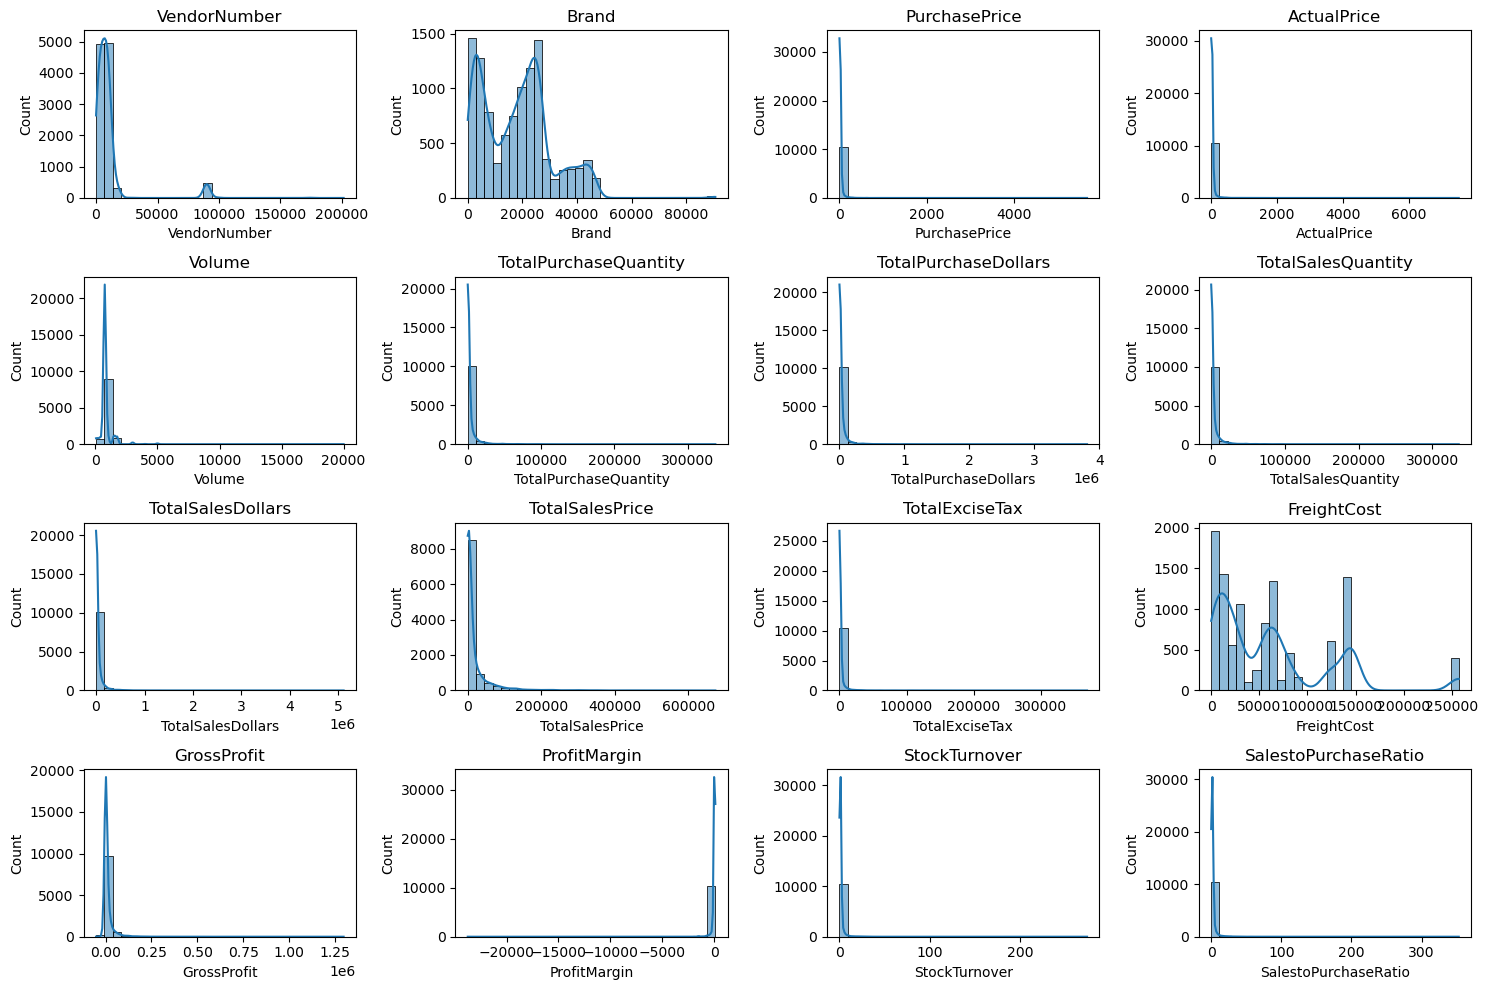

In [5]:
# Describing Plots for Numerical Columns

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

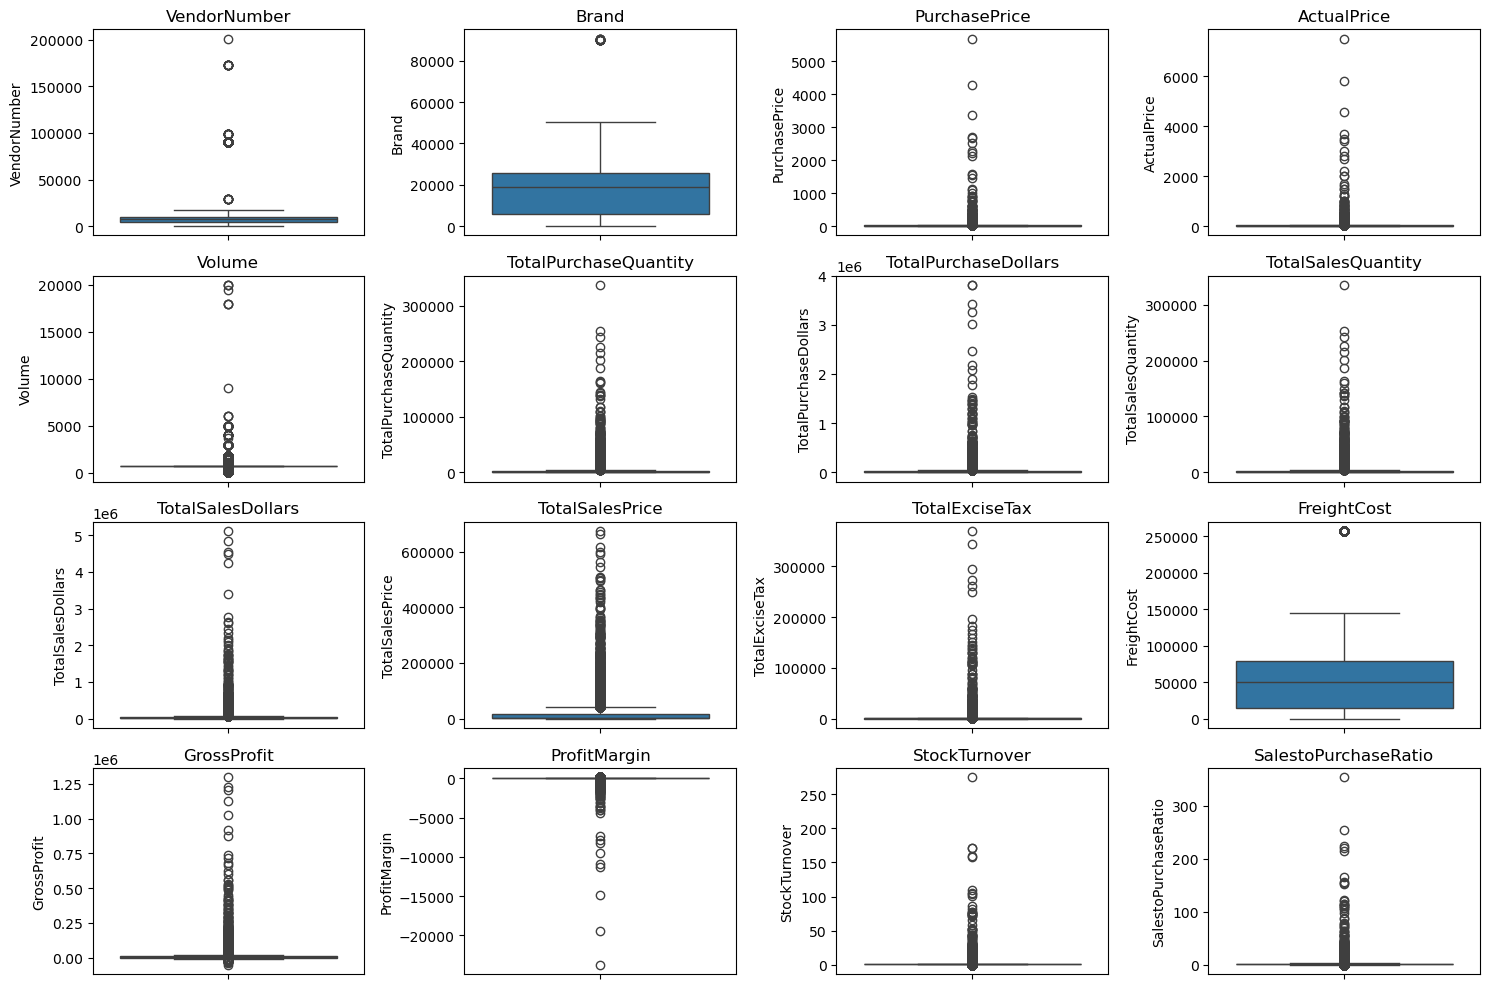

In [6]:
# Outliers Detection with Boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Summary Statistics Insights:

Negative and Zero Values:

* Gross  Profit: Minimum value is -52,002.78, indicating losses.Some products or transactions may be selling at a loss due to
  high costs or selling at discounts lower than the purchase price.
* Profit Margin: Has a minimum of -infinite, which suggests cases where revenue is zero or even lower than the costs.
* Total Sales Quantity and sales Dollars: Minimum values are 0, meaning some products were purchased but never sold.
  These could be slow-moving or obsolete stock.

  Outliers Induicated by High Standard Deviations:
* Purchase and Actual Prices: The max values(5,681.81 and 7,499.99) are slightly higher tahn the mean(24.39 and 35.64), indicating potential premium
  products.
* Freight Cost: Huge variation, from 0.09 to 257,032.07 suggests logistics inefficiencies or bulk shipments.
* Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinately. Value more than 1 indicates that
* Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [7]:
# let's filter the data by removing incosistencies
df= pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
where GrossProfit >0
AND ProfitMargin >0
AND TotalSalesQuantity > 0""",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142219.0,5107867.81,673589.09,261311.55,68601.68,1296616.21,25.384686,0.980280,1.340207
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160588.0,4828959.08,562150.15,295065.24,144929.24,1024917.86,21.224406,0.978968,1.269429
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187538.0,4547469.62,462126.73,344585.38,123780.22,1129165.94,24.830643,1.000699,1.330329
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200929.0,4486824.71,420511.79,369192.74,257032.07,1225626.77,27.316128,0.996266,1.375821
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,136034.0,4228985.66,546438.06,249947.98,257032.07,1205779.65,28.512266,0.984976,1.398841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8563,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8564,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8565,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,4.0,3.96,1.98,0.20,14069.87,2.48,62.626263,2.000000,2.675676
8566,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


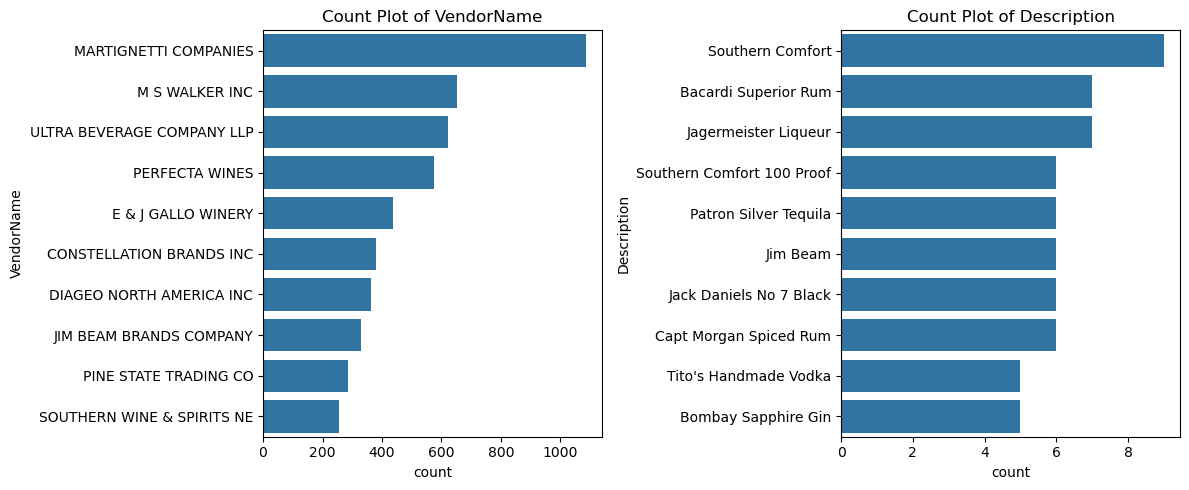

In [8]:
#  Count Plots for Categorical Colums
categorical_cols = ["VendorName" , "Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1) # Adjust grid layout as needed
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

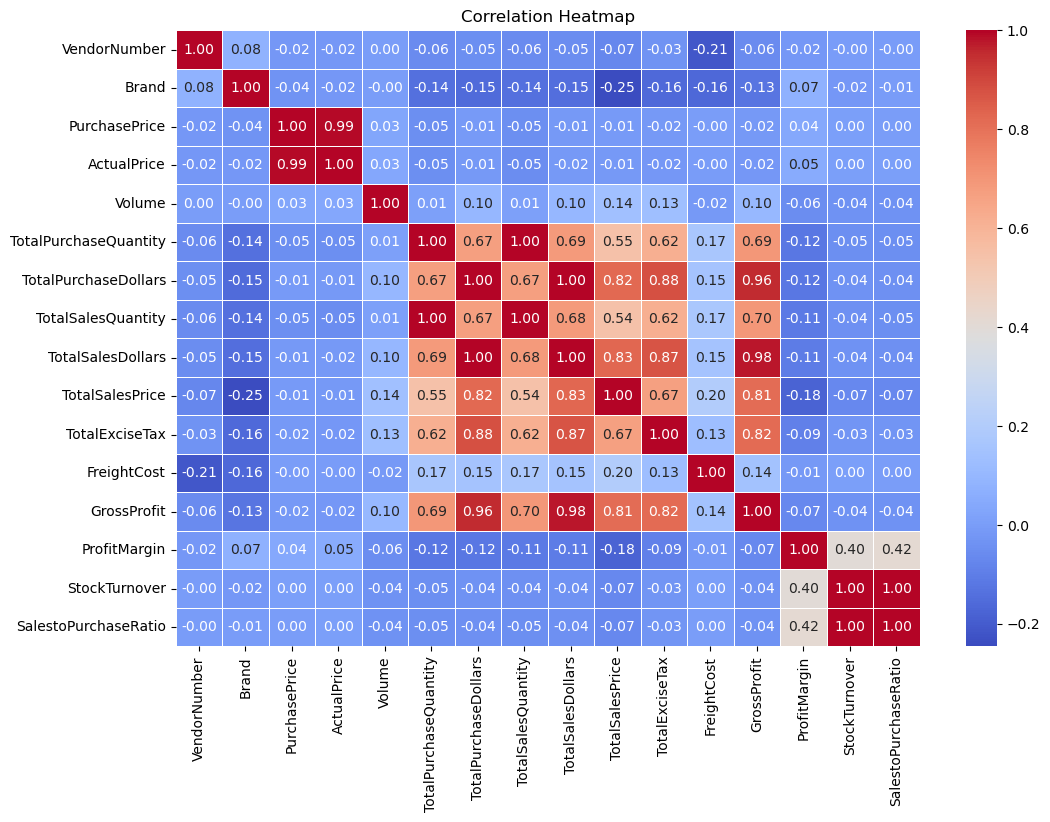

In [9]:
# Correlation HeatMap

plt.figure(figsize = (12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Insights
* PurchasePrice has weak correlation with TotalSalesDollars (-0.012) and GrossProfit(-0.016), suggesting that price variations
do not significantly impact sales revenue or profit
* Strong correlation between total purchase quantity and total sales quantity(0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin and total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to 
competitive pricing pressures.
* Stock Turnover has weak negative correlations with both GrossProfit(-0.038) and ProfitMargin(-0.055), including that 
faster yurover does not necessarily result in higher probability.

In [ ]:
cursor.execute("PRAGMA table_info(vendor_sales_summary)")
for row in cursor.fetchall():
    print(row)

 Data Analysis

 Identify Brands that needs Professional or Pricing Adjustments which exhibit lower sales performance 
 but higher profits margins

In [15]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21554.08,18.193678
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7706,Zorvino Vyds Sangiovese,10616.50,29.774408
7707,Zuccardi Q Malbec,1639.18,23.981503
7708,Zum Rsl,10857.34,32.675038
7709,Zwack Liqueur,227.88,16.653502


In [17]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(.85)

In [18]:
low_sales_threshold

560.095

In [19]:
high_margin_threshold

64.9590209170052

In [40]:
# Filter brands with low sales but high profit margins

target_brands = brand_performance[
      (brand_performance['TotalSalesDollars']<= low_sales_threshold) &
       (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margin")
display(target_brands.sort_values('TotalSalesDollars'))


Brands with low sales but high profit margin


,Description,TotalSalesDollars,ProfitMargin
6202,Santa Rita Organic Svgn Bl,9.99,66.466466
2372,Debauchery Pnt Nr,11.58,65.975820
2072,Concannon Glen Ellen Wh Zin,15.95,83.448276
2190,Crown Royal Apple,27.86,89.806174
6240,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5077,Nanbu Bijin Southern Beauty,535.68,76.747312
2273,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6248,Sbragia Home Ranch Merlot,549.75,66.444748


In [29]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21554.08,18.193678
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7706,Zorvino Vyds Sangiovese,10616.50,29.774408
7707,Zuccardi Q Malbec,1639.18,23.981503
7708,Zum Rsl,10857.34,32.675038
7709,Zwack Liqueur,227.88,16.653502


In [44]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualisation 

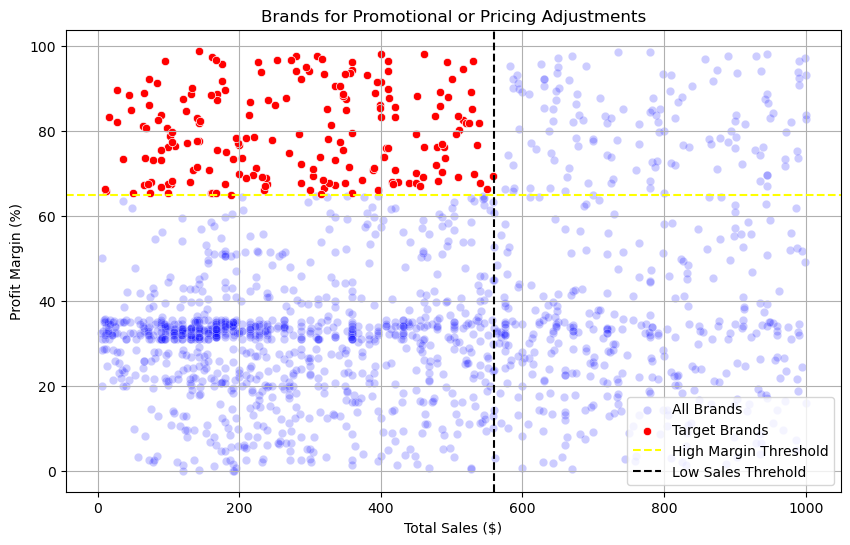

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars', y='ProfitMargin', color="blue" , label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands , x='TotalSalesDollars' , y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--' , color='yellow', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--' , color='black', label="Low Sales Threhold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrates the highest sales performance ?

In [212]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [49]:
# Top, vendors and brands by sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors.apply(lambda x: format_dollars(x))


VendorName
DIAGEO NORTH AMERICA INC      681.26M
MARTIGNETTI COMPANIES         394.43M
PERNOD RICARD USA             321.40M
JIM BEAM BRANDS COMPANY       314.86M
BACARDI USA INC               248.94M
CONSTELLATION BRANDS INC      242.64M
E & J GALLO WINERY            184.37M
BROWN-FORMAN CORP             182.82M
ULTRA BEVERAGE COMPANY LLP    165.34M
M S WALKER INC                147.30M
Name: TotalSalesDollars, dtype: object

In [50]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    79.77M
Tito's Handmade Vodka      74.16M
Grey Goose Vodka           72.19M
Capt Morgan Spiced Rum     63.73M
Absolut 80 Proof           62.58M
Jameson Irish Whiskey      57.30M
Ketel One Vodka            50.78M
Baileys Irish Cream        41.69M
Kahlua                     36.22M
Tanqueray                  34.62M
Name: TotalSalesDollars, dtype: object

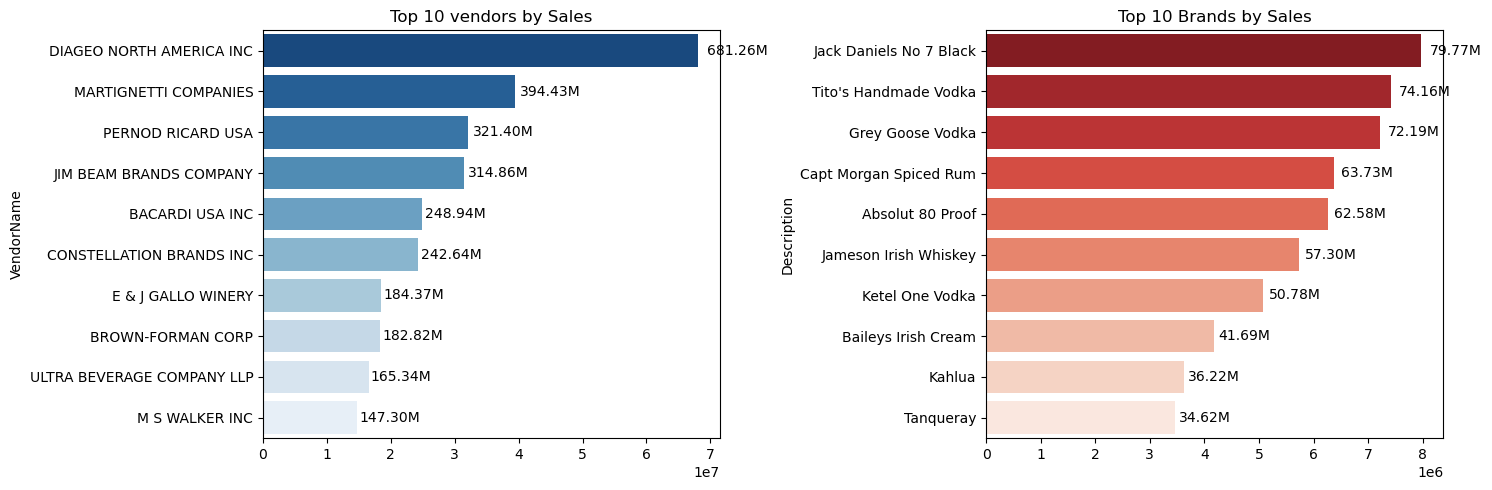

In [59]:
plt.figure(figsize=(15,5))

# Plot for top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+ (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() /2,
             format_dollars(bar.get_width()),
             ha='left' , va='center' , fontsize=10, color='black')

# Plot for top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str) , x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() /2 ,
             format_dollars(bar.get_width()),
             ha='left' , va='center', fontsize=10,color='black')
    
plt.tight_layout()
plt.show()

Which vendor contribute the most to total purchase dollars ?

In [75]:
vendor_performance =df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [98]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [99]:
vendor_performance =round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [100]:
# Display Top 10 vendors

top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)



In [101]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,500.97M,180.29M,681.26M,16.30
57,MARTIGNETTI COMPANIES,255.54M,138.88M,394.43M,8.31
68,PERNOD RICARD USA,238.51M,82.89M,321.40M,7.76
46,JIM BEAM BRANDS COMPANY,234.94M,79.92M,314.86M,7.64
6,BACARDI USA INC,174.32M,74.62M,248.94M,5.67
20,CONSTELLATION BRANDS INC,152.74M,89.90M,242.64M,4.97
11,BROWN-FORMAN CORP,132.39M,50.43M,182.82M,4.31
30,E & J GALLO WINERY,120.69M,63.69M,184.37M,3.93
106,ULTRA BEVERAGE COMPANY LLP,111.69M,53.65M,165.34M,3.63
53,M S WALKER INC,97.64M,49.65M,147.30M,3.18


In [102]:
vendor_performance.shape


(119, 5)

In [103]:
top_vendors['PurchaseContribution%'].sum()

65.7

In [104]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,500.97M,180.29M,681.26M,16.30
57,MARTIGNETTI COMPANIES,255.54M,138.88M,394.43M,8.31
68,PERNOD RICARD USA,238.51M,82.89M,321.40M,7.76
46,JIM BEAM BRANDS COMPANY,234.94M,79.92M,314.86M,7.64
6,BACARDI USA INC,174.32M,74.62M,248.94M,5.67
20,CONSTELLATION BRANDS INC,152.74M,89.90M,242.64M,4.97
11,BROWN-FORMAN CORP,132.39M,50.43M,182.82M,4.31
30,E & J GALLO WINERY,120.69M,63.69M,184.37M,3.93
106,ULTRA BEVERAGE COMPANY LLP,111.69M,53.65M,165.34M,3.63
53,M S WALKER INC,97.64M,49.65M,147.30M,3.18


In [105]:
top_vendors['ComulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,ComulativeContribution%
25,DIAGEO NORTH AMERICA INC,500.97M,180.29M,681.26M,16.30,16.30
57,MARTIGNETTI COMPANIES,255.54M,138.88M,394.43M,8.31,24.61
68,PERNOD RICARD USA,238.51M,82.89M,321.40M,7.76,32.37
46,JIM BEAM BRANDS COMPANY,234.94M,79.92M,314.86M,7.64,40.01
6,BACARDI USA INC,174.32M,74.62M,248.94M,5.67,45.68
20,CONSTELLATION BRANDS INC,152.74M,89.90M,242.64M,4.97,50.65
11,BROWN-FORMAN CORP,132.39M,50.43M,182.82M,4.31,54.96
30,E & J GALLO WINERY,120.69M,63.69M,184.37M,3.93,58.89
106,ULTRA BEVERAGE COMPANY LLP,111.69M,53.65M,165.34M,3.63,62.52
53,M S WALKER INC,97.64M,49.65M,147.30M,3.18,65.70


Text(0.5, 1.0, 'Pareto Chart: Vendor Contribution to Total Purchases')

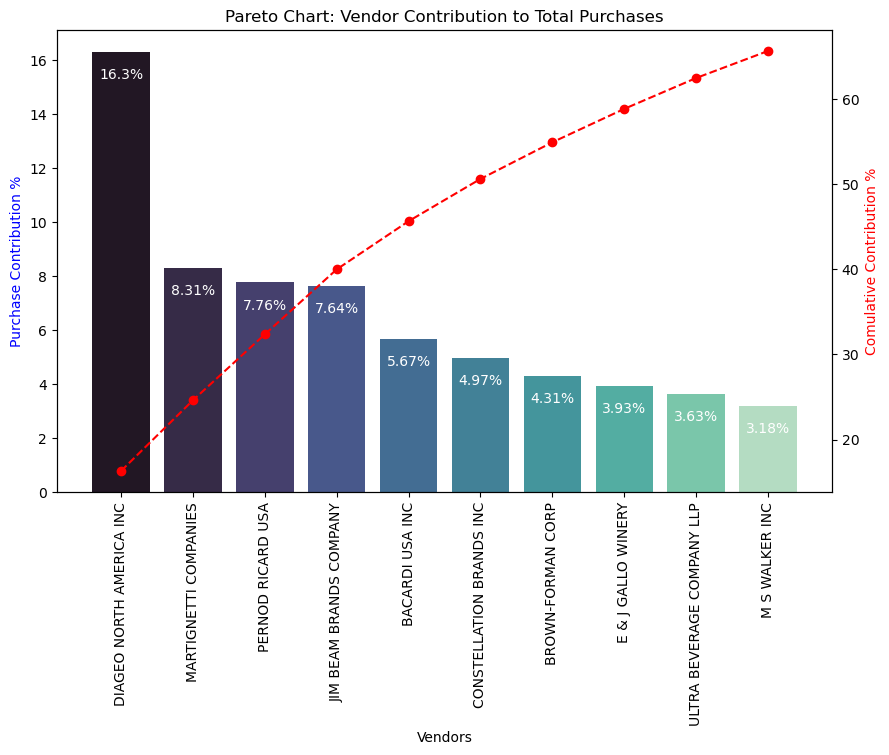

In [114]:
top_vendors['ComulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
flg, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'],palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1, str(value)+'%', ha='center', fontsize=10,color='white')

# Line Plot for Coumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['ComulativeContribution%'],color='red',marker='o', linestyle='dashed',label='ComulativeContribution%')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Comulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases') 

In [109]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,ComulativeContribution%
25,DIAGEO NORTH AMERICA INC,500.97M,180.29M,681.26M,16.30,16.30
57,MARTIGNETTI COMPANIES,255.54M,138.88M,394.43M,8.31,24.61
68,PERNOD RICARD USA,238.51M,82.89M,321.40M,7.76,32.37
46,JIM BEAM BRANDS COMPANY,234.94M,79.92M,314.86M,7.64,40.01
6,BACARDI USA INC,174.32M,74.62M,248.94M,5.67,45.68
20,CONSTELLATION BRANDS INC,152.74M,89.90M,242.64M,4.97,50.65
11,BROWN-FORMAN CORP,132.39M,50.43M,182.82M,4.31,54.96
30,E & J GALLO WINERY,120.69M,63.69M,184.37M,3.93,58.89
106,ULTRA BEVERAGE COMPANY LLP,111.69M,53.65M,165.34M,3.63,62.52
53,M S WALKER INC,97.64M,49.65M,147.30M,3.18,65.70


How much of total procurement is dependent on the top vendors ?

In [116]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.7 %


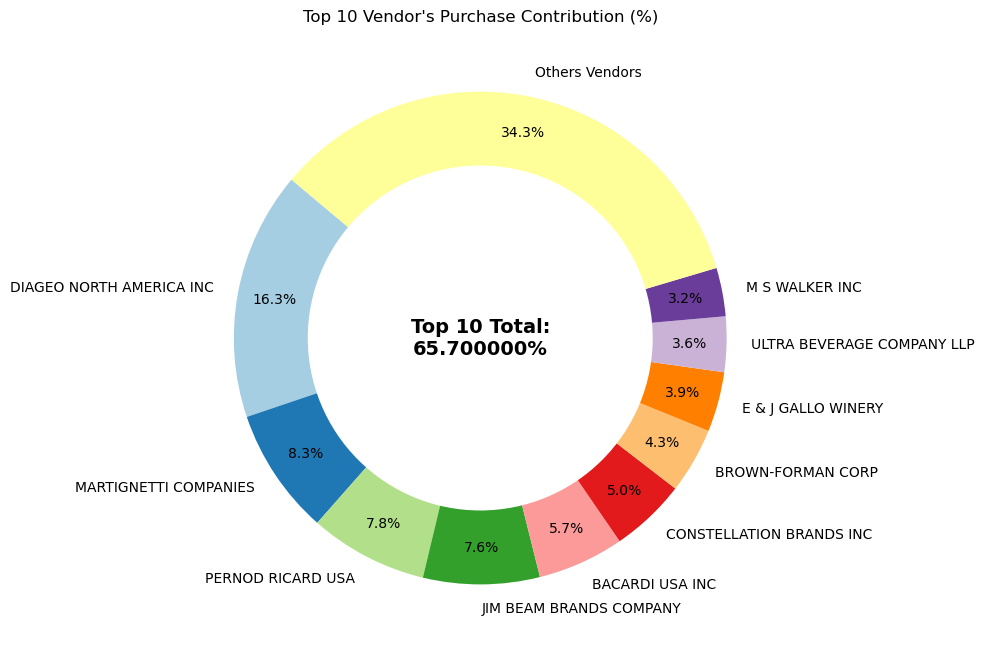

In [122]:

vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Others Vendors")
purchase_contribution.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedgets, texts, autotexts=ax.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%',
                                startangle=140, pctdistance=0.85, colors = plt.cm.Paired.colors)
# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0,0,f"Top 10 Total:\n{total_contribution:2f}%" , fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

Does purchase in bulk reduce the unit price, and what is the optimal purchase volume for cost savings ?

In [124]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [125]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small','Medium','Large'])

In [129]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
Small,39.057028
Medium,15.478473
Large,10.782249


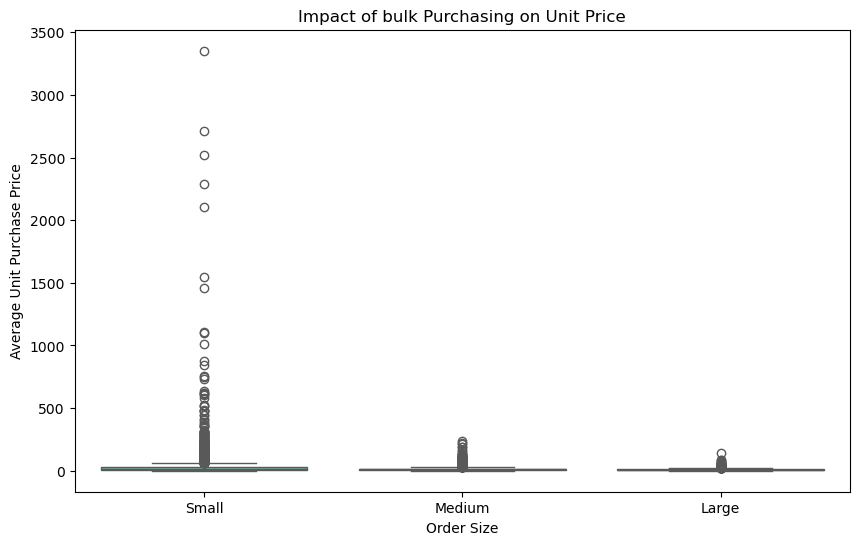

In [130]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

* Vendors buying in bulk (Large Order Size) get the lowest unit price, meaning higher margins, if trhey can manage inventory efficiently.
* The price difference between small and large orders is subsquential(-72% reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors tto purchase large volumes, leading to higher overall sales despite lower 
per unit revenue

In [127]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8563,Small,2
8564,Small,6
8565,Small,2
8566,Small,1


Which vendors have low inventory turnover, indicating excess stock and slow-moving products ?

In [137]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending =True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.791594
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it ?

In [215]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'])* df['PurchasePrice'] 
print( 'Total Unsold Capital:' , format_dollars(df['UnsoldInventoryValue'].sum() ) )

Total Unsold Capital: 2.14M


In [222]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor=df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor= inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)

# converting values into dollars
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,621.47K
46,JIM BEAM BRANDS COMPANY,507.70K
68,PERNOD RICARD USA,414.41K
116,WILLIAM GRANT & SONS INC,388.39K
30,E & J GALLO WINERY,203.42K
79,SAZERAC CO INC,168.19K
11,BROWN-FORMAN CORP,153.12K
77,REMY COINTREAU USA INC,113.68K
61,MOET HENNESSY USA INC,106.74K
54,MAJESTIC FINE WINES,106.63K


In [218]:
inventory_value_per_vendor

,VendorName,UnsoldInventoryValue
0,ADAMBA IMPORTS INTL INC,-91.52
1,ALISA CARR BEVERAGES,-43151.48
2,ALTAMAR BRANDS LLC,464.23
3,AMERICAN SPIRITS EXCHANGE,116.76
4,AMERICAN VINTAGE BEVERAGE,3315.37
...,...,...
114,WEIN BAUER INC,1674.79
115,WESTERN SPIRITS BEVERAGE CO,-1619.72
116,WILLIAM GRANT & SONS INC,388392.57
117,WINE GROUP INC,77692.65


what is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

In [224]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [228]:
top_vendors = df[df['TotalSalesDollars'] >=top_threshold] ['ProfitMargin'].dropna() 
low_vendors = df[df['TotalSalesDollars'] <=low_threshold] ['ProfitMargin'].dropna()

In [229]:
top_vendors

0       25.384686
1       21.224406
2       24.830643
3       27.316128
4       28.512266
          ...    
3420    75.867661
3525    79.684817
3683    85.782102
4753    93.085860
4922    95.012530
Name: ProfitMargin, Length: 2142, dtype: float64

In [230]:
low_vendors

5634     4.111764
5655     6.145626
5704    12.007271
5707     1.677308
5727     7.239599
          ...    
8563    83.448276
8564    96.436186
8565    62.626263
8566    98.974037
8567    99.166079
Name: ProfitMargin, Length: 2142, dtype: float64

In [244]:
def confidence_interval(data , confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1)/np.sqrt(len(data)) # standard error
    t_critical = stats.t.ppf((1+confidence) / 2 , df=len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val , mean_val - margin_of_error , mean_val + margin_of_error

Top Vendors 95 % CI: (30.81 , 31.68), Mean: 31.24
Low Vendors 95 % CI: (40.53 , 42.66), Mean: 41.59


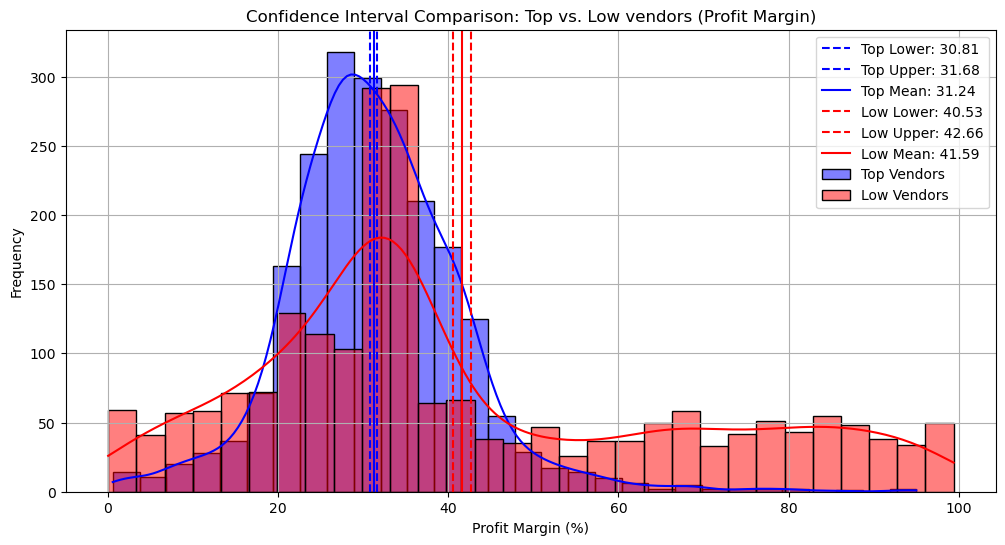

In [245]:
top_mean, top_lower , top_upper = confidence_interval(top_vendors)
low_mean, low_lower , low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95 % CI: ({top_lower:.2f} , {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95 % CI: ({low_lower:.2f} , {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue" , bins=30, alpha=0.5 , label="Top Vendors")
plt.axvline(top_lower, color="blue" , linestyle='--', label=f'Top Lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle='--', label=f'Top Upper: {top_upper:.2f}')
plt.axvline(top_mean, color='blue' , linestyle='-', label=f'Top Mean: {top_mean:.2f}')

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red" , bins=30, alpha=0.5 , label="Low Vendors")
plt.axvline(low_lower, color="red" , linestyle='--', label=f'Low Lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle='--', label=f'Low Upper: {low_upper:.2f}')
plt.axvline(low_mean, color='red' , linestyle='-', label=f'Low Mean: {low_mean:.2f}')

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


* The confidence interval for low - performing vendors (40.53% to 42.66%) is significantly higher than that of top-performing
  vendors(30.81 % to 31.68%)
* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing
   or lower operational costs.
* For high performing vendors: If they aim to improve profitability, they could explore selective price adjustments,
   costs optimization , or building strategies.
* For low-performing vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive
    pricing , or improved distribution strategies.

Is there a significant difference in profit margins between top-performing and low-performing vendors?
Hypothesis:

Ho (Null Hypothesis): There is no significant difference in the main profit margins of top-performing and low-performing vendors.

H1(Alternate Hypothesis): The mean profit margins of top-performing vendors are significantly different.

In [247]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >=top_threshold] ['ProfitMargin'].dropna() 
low_vendors = df[df['TotalSalesDollars'] <=low_threshold] ['ProfitMargin'].dropna()

# Perform two sample t test
t_start, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results

print(f"T-Statistic: {t_start:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Rejects Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to reject  Ho: No significant difference in profit margins.")

T-Statistic: -17.6283, P-value: 0.0000
Rejects Ho: There is a significant difference in profit margins between top and low-performing vendors.


In [248]:
vedor_sales_summary

NameError: name 'vedor_sales_summary' is not defined

In [253]:
df2= pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
""",conn)
df2

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142219.0,5107867.81,673589.09,261311.55,68601.68,1296616.21,25.384686,0.980280,1.340207
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160588.0,4828959.08,562150.15,295065.24,144929.24,1024917.86,21.224406,0.978968,1.269429
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187538.0,4547469.62,462126.73,344585.38,123780.22,1129165.94,24.830643,1.000699,1.330329
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200929.0,4486824.71,420511.79,369192.74,257032.07,1225626.77,27.316128,0.996266,1.375821
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,136034.0,4228985.66,546438.06,249947.98,257032.07,1205779.65,28.512266,0.984976,1.398841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,4.0,3.96,1.98,0.20,14069.87,2.48,62.626263,2.000000,2.675676
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [264]:
df2.to_excel("vendor_sales_summary.xlsx", index = False, engine='openpyxl')

In [257]:
df2

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142219.0,5107867.81,673589.09,261311.55,68601.68,1296616.21,25.384686,0.980280,1.340207
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160588.0,4828959.08,562150.15,295065.24,144929.24,1024917.86,21.224406,0.978968,1.269429
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187538.0,4547469.62,462126.73,344585.38,123780.22,1129165.94,24.830643,1.000699,1.330329
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200929.0,4486824.71,420511.79,369192.74,257032.07,1225626.77,27.316128,0.996266,1.375821
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,136034.0,4228985.66,546438.06,249947.98,257032.07,1205779.65,28.512266,0.984976,1.398841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,4.0,3.96,1.98,0.20,14069.87,2.48,62.626263,2.000000,2.675676
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
